In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

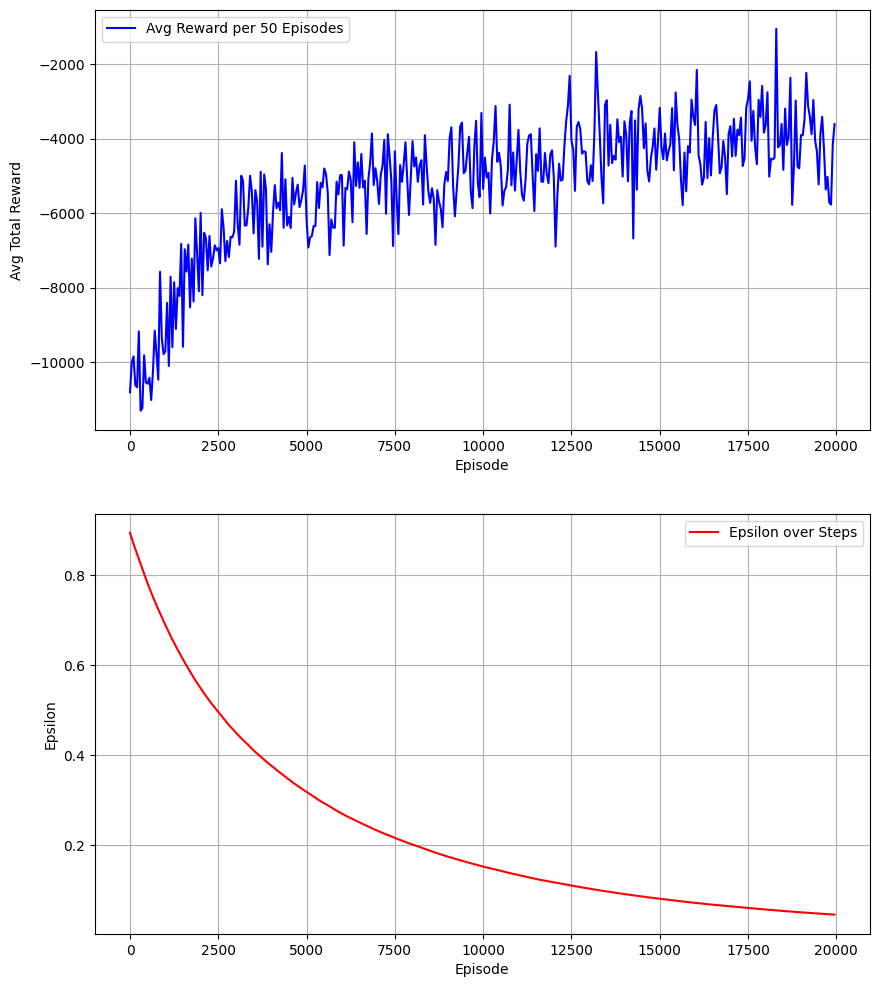

In [21]:
episodes = []
rewards = []
steps = []
epsilons = []

with open('q_learning_results.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        episodes.append(int(row[0]))
        rewards.append(float(row[1]))
        steps.append(int(row[2]))
        epsilons.append(float(row[3]))

# Aggregate results every 50 episodes
bin_size = 500
avg_rewards = [np.mean(rewards[i:i+bin_size]) for i in range(0, len(rewards), bin_size)]
avg_steps = [np.mean(steps[i:i+bin_size]) for i in range(0, len(steps), bin_size)]
avg_epsilons = [np.mean(epsilons[i:i+bin_size]) for i in range(0, len(epsilons), bin_size)]
avg_episodes = list(range(0, len(rewards), bin_size))

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].plot(avg_episodes, avg_rewards, label='Avg Reward per 50 Episodes', color='blue')
axs[0].set_xlabel('Episode')
axs[0].set_ylabel('Avg Total Reward')
axs[0].legend()
axs[0].grid()

axs[1].plot(avg_episodes, avg_epsilons, label='Epsilon over Steps', color='red')
axs[1].set_xlabel('Episode')
axs[1].set_ylabel('Epsilon')
axs[1].legend()
axs[1].grid()

plt.show()